<a href="https://www.kaggle.com/code/raghadsayed/utk-age-estimation?scriptVersionId=91140356" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# **Introduction**

# ****Dataset Description****
* UTKFace dataset is a large-scale face dataset with long age span (range from 0 to 116 years old). The dataset consists of over 20,000 face images with annotations of age, gender, and ethnicity. This dataset could be used on a variety of tasks, e.g., face detection, age estimation, etc.
****Data Dictionary****
 *   Age (0 to 116 years old)
 *   gender (0:male,1:female)
 *   ethnicity [ 0: "White", 1: "Black", 2: "Asian", 3: "Indian", 4: "Hispanic" ]
 *   image name
 *   pixles

In [1]:
# importing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [2]:
# Load your data 
file_path = "../input/age-gender-and-ethnicity-face-data-csv/age_gender.csv"
df = pd.read_csv(file_path)
#and print out a few lines(first five rows).
df.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [3]:
# types and look for instances of missing or possibly errant data.
df.info()
#check dataframe shape
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        23705 non-null  int64 
 1   ethnicity  23705 non-null  int64 
 2   gender     23705 non-null  int64 
 3   img_name   23705 non-null  object
 4   pixels     23705 non-null  object
dtypes: int64(3), object(2)
memory usage: 926.1+ KB


(23705, 5)

****number of samples is 23705, and there is no any missing data****

In [4]:
#check if there are dublicated records
df.duplicated()
df.duplicated().sum()

0

In [5]:
# check for number of the unique values for each column
col = list(df.columns.values)
for i in col:
    noUniq = df[i].nunique()    
    print( "number of unique values in {} is :".format(i) ,noUniq)
print("_______________________________________________________________________")    
# check for the unique values in some columns
col = list(df.columns.values)
for i in col:
    if i not in ['img_name', 'pixels']:
        unique = df[i].unique()
        print( "number of unique value in {} is :".format(i) , unique )

number of unique values in age is : 104
number of unique values in ethnicity is : 5
number of unique values in gender is : 2
number of unique values in img_name is : 23479
number of unique values in pixels is : 23315
_______________________________________________________________________
number of unique value in age is : [  1  10 100 101 103 105  11 110 111 115 116  12  13  14  15  16  17  18
  19   2  20  21  22  23  24  25  26  27  28  29   3  30  31  32  33  34
  35  36  37  38  39   4  40  41  42  43  44  45  46  47  48  49   5  50
  51  52  53  54  55  56  57  58  59   6  60  61  62  63  64  65  66  67
  68  69   7  70  71  72  73  74  75  76  77  78  79   8  80  81  82  83
  84  85  86  87  88  89   9  90  91  92  93  95  96  99]
number of unique value in ethnicity is : [2 3 4 0 1]
number of unique value in gender is : [0 1]


In [6]:
df_clean = df.copy()

**Generating the correlation heatmap to compare the correlation between features and remove one of two features that have a correlation higher than 0.9**

In [7]:
corr = df_clean.corr()

<AxesSubplot:>

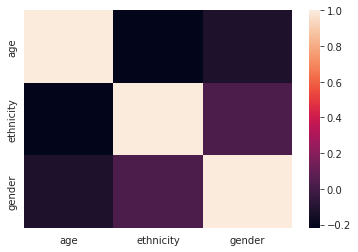

In [8]:
sns.heatmap(corr)

there is no correlation between any two features.

In [9]:
df_clean=df.loc[:,'pixels']
print(df_clean)

0        129 128 128 126 127 130 133 135 139 142 145 14...
1        164 74 111 168 169 171 175 182 184 188 193 199...
2        67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3        193 197 198 200 199 200 202 203 204 205 208 21...
4        202 205 209 210 209 209 210 211 212 214 218 21...
                               ...                        
23700    127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701    23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702    59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703    45 108 120 156 206 197 140 180 191 199 204 207...
23704    156 161 160 165 170 173 166 177 183 191 187 18...
Name: pixels, Length: 23705, dtype: object


In [10]:
# Getting Image data
def toPixels(pixels):
    arr = np.array(pixels.split(),"float64")
    arr = arr.reshape(48,48)
    
    return arr


In [11]:
%%time
df["pixels"] = df["pixels"].apply(toPixels)

CPU times: user 7.82 s, sys: 311 ms, total: 8.13 s
Wall time: 8.19 s


In [12]:
pixels = np.reshape(df["pixels"].to_list(), (df.shape[0],48,48,1))
pixels.shape

(23705, 48, 48, 1)

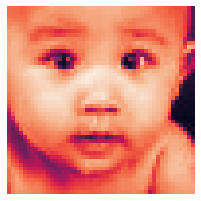

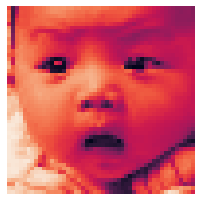

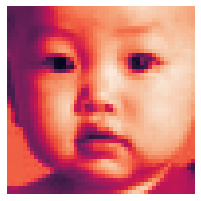

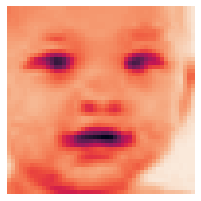

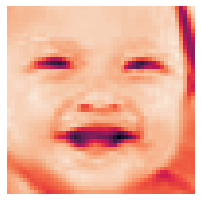

In [13]:
for i in range(5):
        plt.figure(figsize=[22,20])
        plt.subplot(5,5,i+1)
        plt.imshow(pixels[i])
        plt.axis('off')
        plt.show()


# ****Exploratory Data Analysis****

In [14]:
# check the count of different ages
df["age"].value_counts()

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: age, Length: 104, dtype: int64

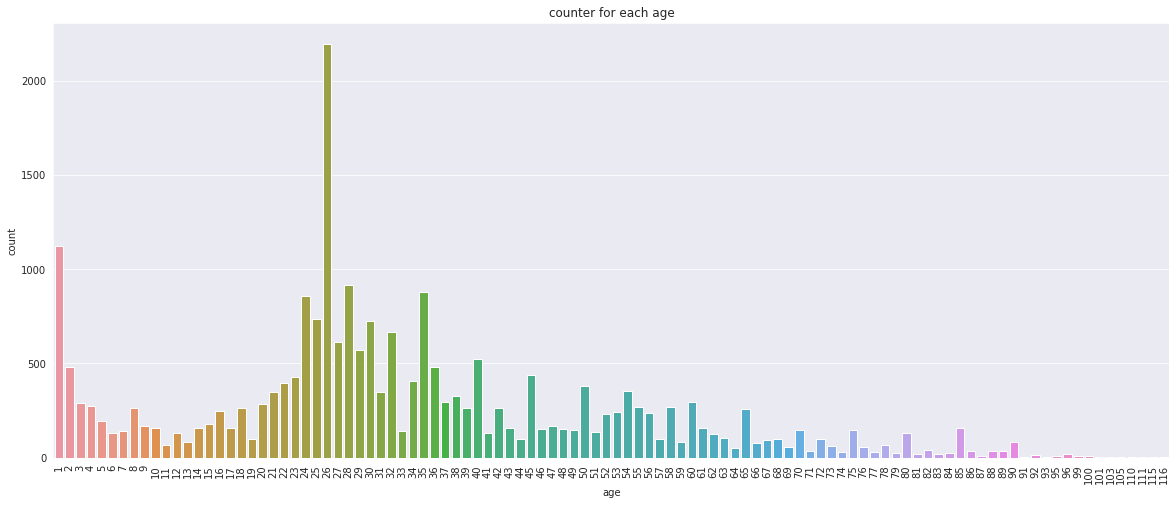

In [15]:
# the counter for each age
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.age)
ax.set_title("counter for each age")
plt.show()

**we can notice from 50 to 116 years old the number of data is less than 500 and between 3 to 24 as well** 

**So we can apply the Data binning**,is a data pre-processing method used to minimize the effects of small observation errors. The original data values are divided into small ranges known as bins and then replaced by an overall calculated value for that bin. This has a smoothing effect on the input data and can also reduce the chances of overfitting in the case of small data sets.
* The most commonly used discretization approaches are equal-width and equal-frequency, but for our data considering age, equal-frequency is preferable because it improves the value spread, can handle outliers, and can be combined with categorical encoding.

In [16]:
df_clean = df.copy()
df['points_bin'] = pd.qcut(df_clean['age'], q=10)

#view updated DataFrame
print(df)
df['points_bin'].value_counts()

       age  ethnicity  gender                        img_name  \
0        1          2       0  20161219203650636.jpg.chip.jpg   
1        1          2       0  20161219222752047.jpg.chip.jpg   
2        1          2       0  20161219222832191.jpg.chip.jpg   
3        1          2       0  20161220144911423.jpg.chip.jpg   
4        1          2       0  20161220144914327.jpg.chip.jpg   
...    ...        ...     ...                             ...   
23700   99          0       1  20170120221920654.jpg.chip.jpg   
23701   99          1       1  20170120134639935.jpg.chip.jpg   
23702   99          2       1  20170110182418864.jpg.chip.jpg   
23703   99          2       1  20170117195405372.jpg.chip.jpg   
23704   99          0       1  20170110182052119.jpg.chip.jpg   

                                                  pixels     points_bin  
0      [[129.0, 128.0, 128.0, 126.0, 127.0, 130.0, 13...   (0.999, 6.0]  
1      [[164.0, 74.0, 111.0, 168.0, 169.0, 171.0, 175...   (0.999, 6.0]

(34.0, 40.0]     2772
(20.0, 25.0]     2760
(0.999, 6.0]     2494
(6.0, 20.0]      2383
(50.0, 61.0]     2370
(29.0, 34.0]     2290
(61.0, 116.0]    2236
(25.0, 26.0]     2197
(26.0, 29.0]     2103
(40.0, 50.0]     2100
Name: points_bin, dtype: int64

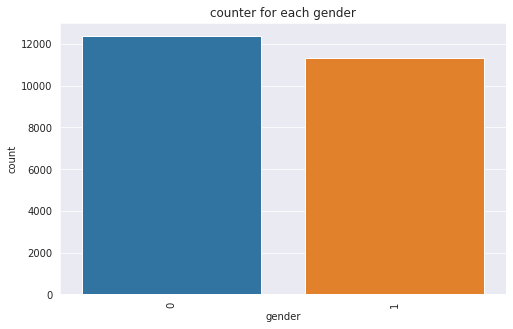

In [17]:
# the counter for each gender
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.gender)
ax.set_title("counter for each gender")
plt.show()

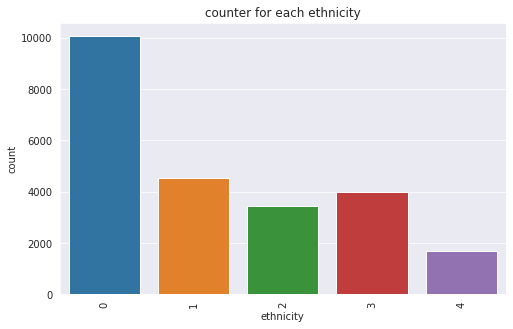

In [18]:
# the counter for each gender
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.ethnicity)
ax.set_title("counter for each ethnicity")
plt.show()

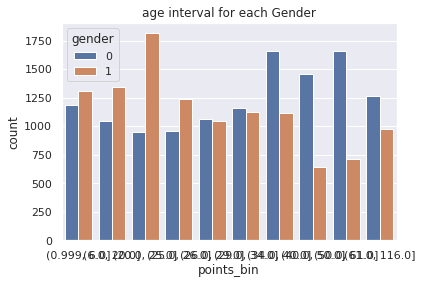

In [19]:
import seaborn as sns
sns.set()
ax = sns.countplot(x=df.points_bin, hue=df.gender)
ax.set_title("age interval for each Gender")
x_ticks_labels=['F', 'M']
plt.rcParams["figure.figsize"] = (10,10)
plt.show();

In [20]:
# check the count of different ages
#gender distriutions
df["gender"].value_counts()

0    12391
1    11314
Name: gender, dtype: int64

In [21]:
handi_counts = df.groupby(['age', 'gender']).count()['img_name']
handi_counts

age  gender
1    0         645
     1         478
2    0         228
     1         254
3    0          97
              ... 
110  0           2
     1           3
111  1           1
115  1           3
116  1           4
Name: img_name, Length: 201, dtype: int64

In [22]:
# creat a function to return a bar plot to compare age intervals for different aspects.
def bar_plots(df, category):
    df_clean_category = pd.crosstab(df[category], df.points_bin, normalize = 'index')
    df_clean_category = np.round((df_clean_category * 100), decimals=2)
    ax = df_clean_category.plot.bar(figsize=(10,5));
   # ax.set_title('\n age in (% attendance) (by {} )\n'.format(df_clean_category.index.name), fontsize = 15)
    ax.set_ylabel('(%)')
    ax.legend(loc = 'upper left',bbox_to_anchor=(1.0,1.0), fontsize= 12)
    rects = ax.patches
    #print(rects)
    # add labels
    for rect in rects:
        height = rect.get_height()
        print(height)
        ax.text(rect.get_x() + rect.get_width()/2, 
                height , 
                str(height)+'%', 
                ha='center', 
                va='bottom',
                fontsize = 10)
    return df_clean_category

9.56
11.57
8.41
11.85
7.63
16.03
7.71
10.98
8.57
9.2
9.38
9.97
13.4
9.82
11.75
5.69
13.41
6.26
10.17
8.63


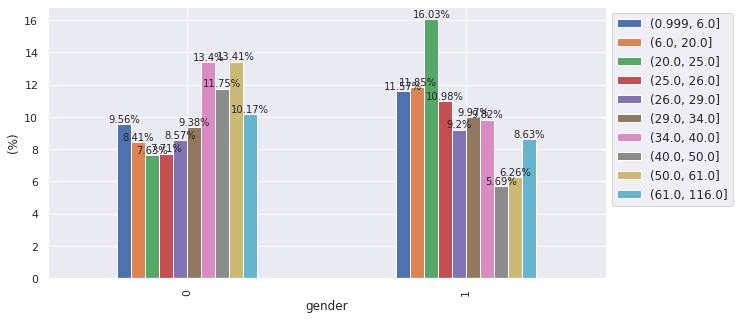

In [23]:
# bar plot for the age precentages for each gender
df_Hndcp =  bar_plots(df, 'gender')
plt.rcParams["figure.figsize"] = (10,10)
plt.show();

we can see that the percentage of females from 1 to 29 years old is greater than males

7.26
2.47
25.45
11.07
19.86
14.2
6.36
5.18
6.01
14.6
7.22
12.0
16.51
15.32
18.5
5.25
14.03
10.75
12.28
10.4
6.1
13.61
10.66
9.08
8.57
8.22
14.3
9.2
8.86
8.69
11.85
15.73
8.01
10.94
9.22
10.28
8.31
3.55
11.55
6.32
14.31
7.0
3.73
10.92
2.9
15.31
6.19
6.96
3.97
0.95


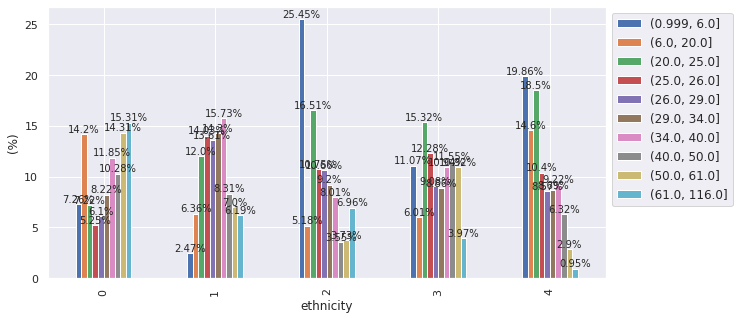

In [24]:
# bar plot for the age precentages for each ethnicity
df_Hndcp =  bar_plots(df, 'ethnicity')
plt.rcParams["figure.figsize"] = (10,20)
plt.show();

# Conclusions
* It is a good dataset for age estimation from face images
* It has other features to estimate from face images as gender and ethincity as well 
* It has enough data in some intervals and less in others so we avoid this porblem by using data binging to avoid biasing or overfitting when apply machine learning/deep learning models 